#                                CHI-COVID :
#### Hello, my name is Jaleel and I am working on a project to analyze COVID-19 data across different zip codes from 2020 - now.  Using Python, I've visualized the data through time series charts and bar graphs, highlighting areas with the highest, middle, and lowest cases. Additionally, I am examining how factors like race and socioeconomic status intersect with COVID-19 impacts in these communities. This analysis will help in understanding the disparities. I will also be examining to see if socioenomic status correlates to covid cases

In [1]:
from matplotlib import pyplot as plt
import numpy as py
import pandas as pd
import geopandas as gpd
from keplergl import KeplerGl

# Race vs Total Cases: 
## Data Cleaning: 
After loading the file CSV file, clean it by converting necessary columns to numerical types, and check for any missing values
## Data Analysis: 
Visualize the data and look for patterns and spot trends.
## Statiscial Analysis: 
Finally, Calculating correlation coefficients to help understand relationships between data

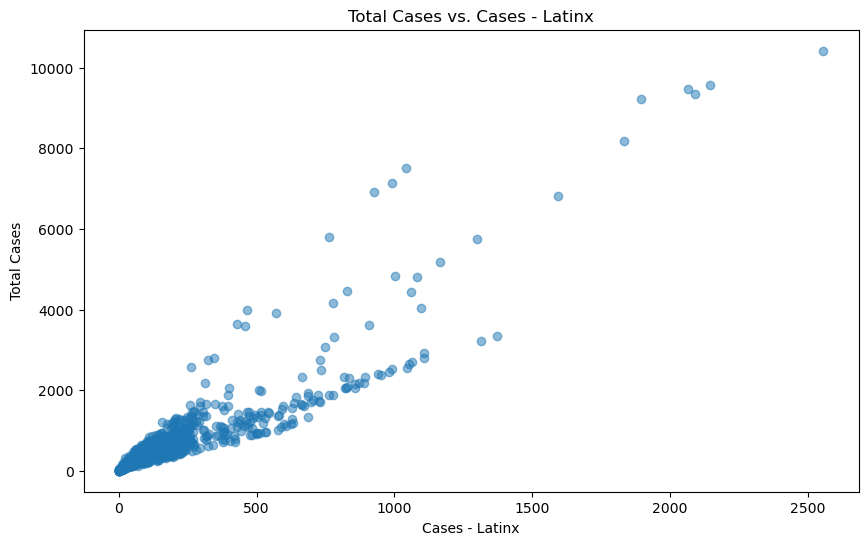

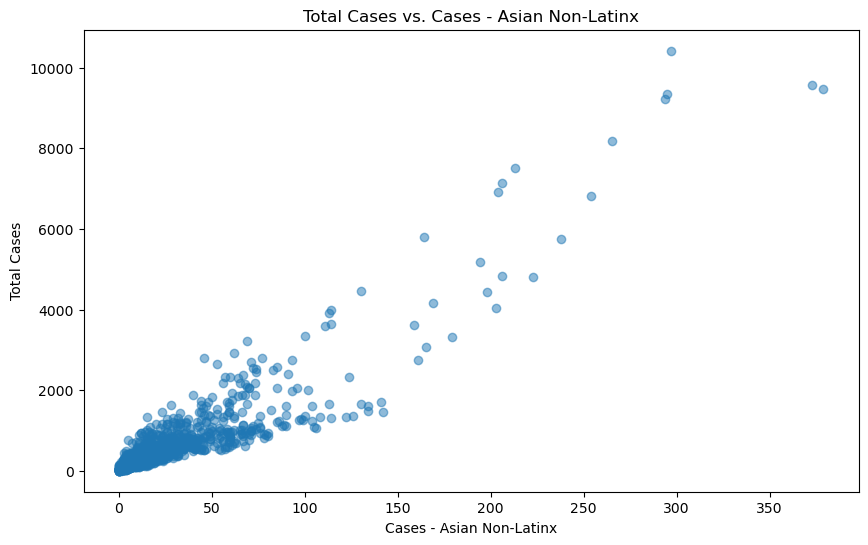

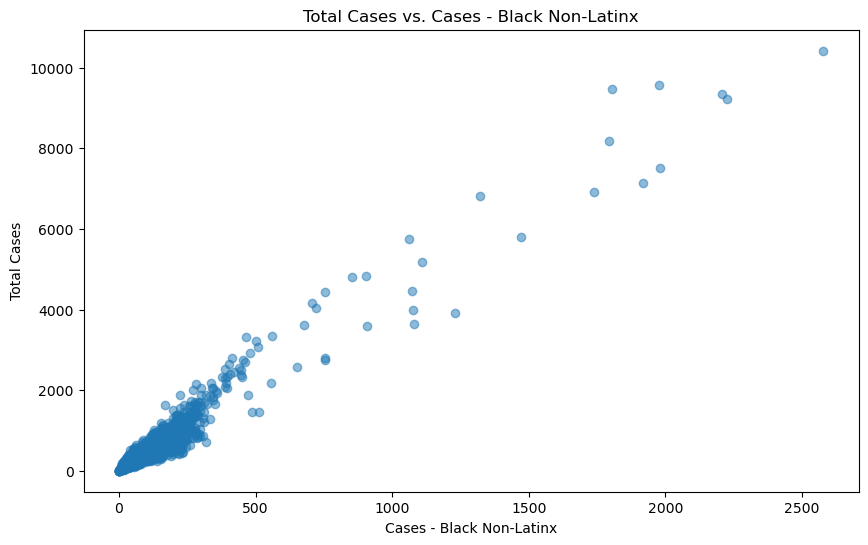

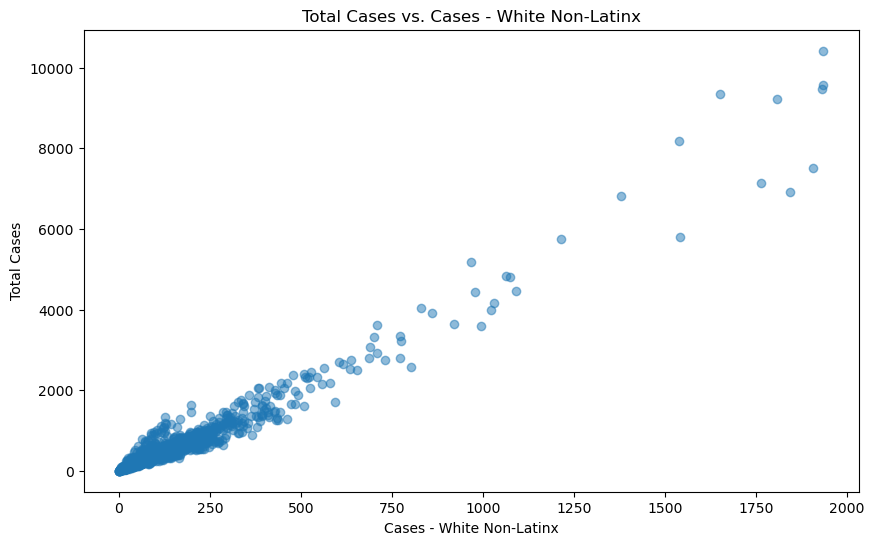

                          Cases - Latinx  Cases - Asian Non-Latinx  \
Cases - Latinx                  1.000000                  0.809505   
Cases - Asian Non-Latinx        0.809505                  1.000000   
Cases - Black Non-Latinx        0.838070                  0.862609   
Cases - White Non-Latinx        0.859380                  0.923481   
Cases - Total                   0.916455                  0.917917   

                          Cases - Black Non-Latinx  Cases - White Non-Latinx  \
Cases - Latinx                            0.838070                  0.859380   
Cases - Asian Non-Latinx                  0.862609                  0.923481   
Cases - Black Non-Latinx                  1.000000                  0.938165   
Cases - White Non-Latinx                  0.938165                  1.000000   
Cases - Total                             0.969376                  0.976364   

                          Cases - Total  
Cases - Latinx                 0.916455  
Cases - Asian 

In [2]:
# Load the data
data = pd.read_csv('COVID_BY_RACE_20240422.csv')

# List of relevant columns for race-specific data (cases and deaths)
race_cases_columns = ['Cases - Latinx', 'Cases - Asian Non-Latinx', 'Cases - Black Non-Latinx', 'Cases - White Non-Latinx']
race_deaths_columns = ['Deaths - Latinx', 'Deaths - Asian Non-Latinx', 'Deaths - Black Non-Latinx', 'Deaths - White Non-Latinx']

# Function to convert columns to numeric
def convert_to_numeric(df, cols):
    for col in cols:
        # Check if the data type of the column is 'object', if so, try to convert to numeric
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col].str.replace(',', '').str.strip(), errors='coerce')
        else:
            # If the column is already numeric, we don't need to do anything
            pass

convert_to_numeric(data, race_cases_columns + race_deaths_columns)

# Plotting total cases vs. racial demographics
racial_cols = ['Cases - Latinx', 'Cases - Asian Non-Latinx', 'Cases - Black Non-Latinx', 'Cases - White Non-Latinx']
for col in racial_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(data[col], data['Cases - Total'], alpha=0.5)
    plt.title(f'Total Cases vs. {col}')
    plt.xlabel(col)
    plt.ylabel('Total Cases')
    plt.show()
    
# Calculate correlation matrix
correlation_matrix = data[racial_cols + ['Cases - Total']].corr()
print(correlation_matrix)


# Findings: 
### 1 indicates a perfect positive correlation: as one variable increases, the other variable also increases.
### -1 indicates a perfect negative correlation: as one variable increases, the other variable decreases.
### 0 indicates no linear correlation between the variables.

#### Interpretation of Correlation Matrix
Diagonal (1.000000): The diagonal of the matrix, where each race is correlated with itself, is always 1 because a variable is perfectly correlated with itself.
#### Cases - Latinx and Other Groups:
With Asian Non-Latinx: 0.809505, indicating a strong positive correlation.
With Black Non-Latinx: 0.838070, also indicating a strong positive correlation.
With White Non-Latinx: 0.859380, indicating a strong positive correlation.
With Total Cases: 0.916455, indicating a very strong positive correlation.
#### Cases - Asian Non-Latinx and Other Groups:
With Black Non-Latinx: 0.862609, indicating a strong positive correlation.
With White Non-Latinx: 0.923481, indicating a very strong positive correlation.
With Total Cases: 0.917917, indicating a very strong positive correlation.
#### Cases - Black Non-Latinx and Other Groups:
With White Non-Latinx: 0.938165, indicating a very strong positive correlation.
With Total Cases: 0.969376, indicating a very strong positive correlation.
#### Cases - White Non-Latinx:
With Total Cases: 0.976364, indicating a very strong positive correlation.
#### Key Takeaways
High Correlation Among Racial Groups: The high positive correlations between different racial groups suggest that areas with high cases in one group tend to have high cases in other groups as well. This could be reflective of geographic or social factors affecting these communities similarly.
Very Strong Correlation with Total Cases: The high correlation values between each racial group's cases and the total cases suggest that increases in cases among any single racial group significantly contribute to the total case counts. This highlights the impact of each group on the overall COVID-19 burden in the area.

# Population by Zip vs Time:
Because there wasn't much of correlation to socioeconomic status and covid cases, lets examine population by zip vs cases to see if there is any correlation.
### Data Cleaning: 
After loading the file CSV file, clean it by converting necessary columns to numerical types, and check for any missing values
### Data Analysis: 
Visualize the data and look for patterns and spot trends.

population          0
cases_cumulative    0
dtype: int64


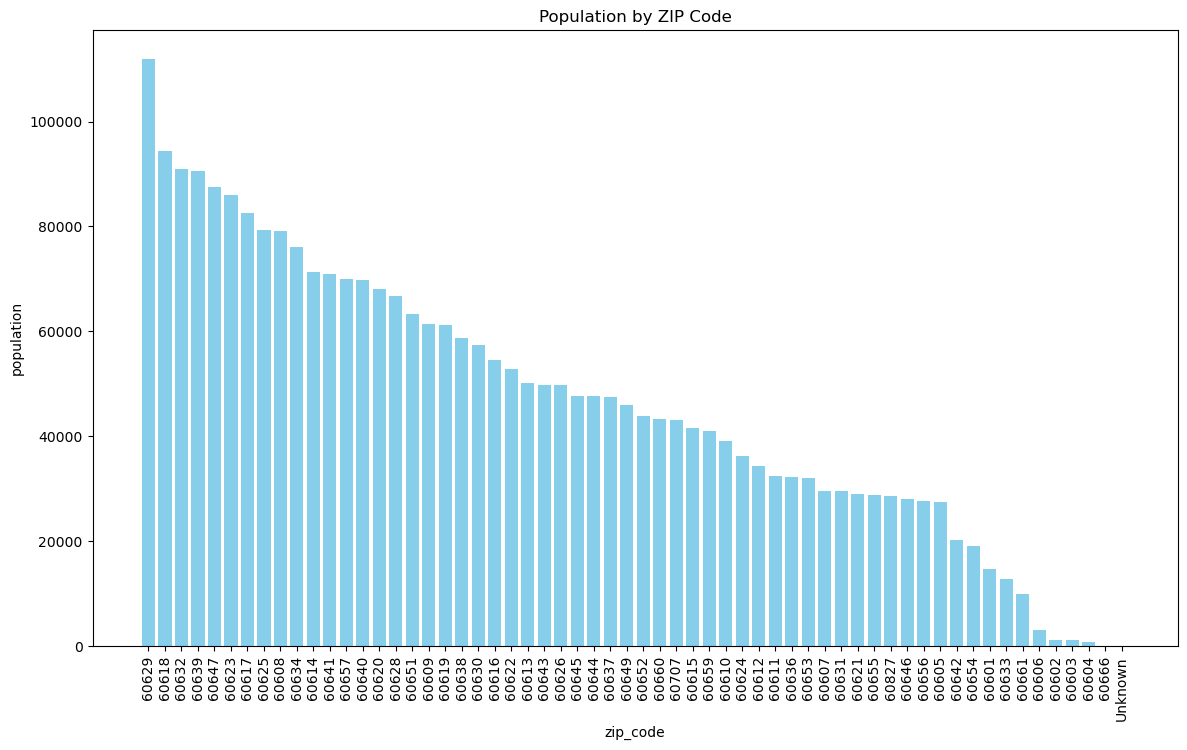

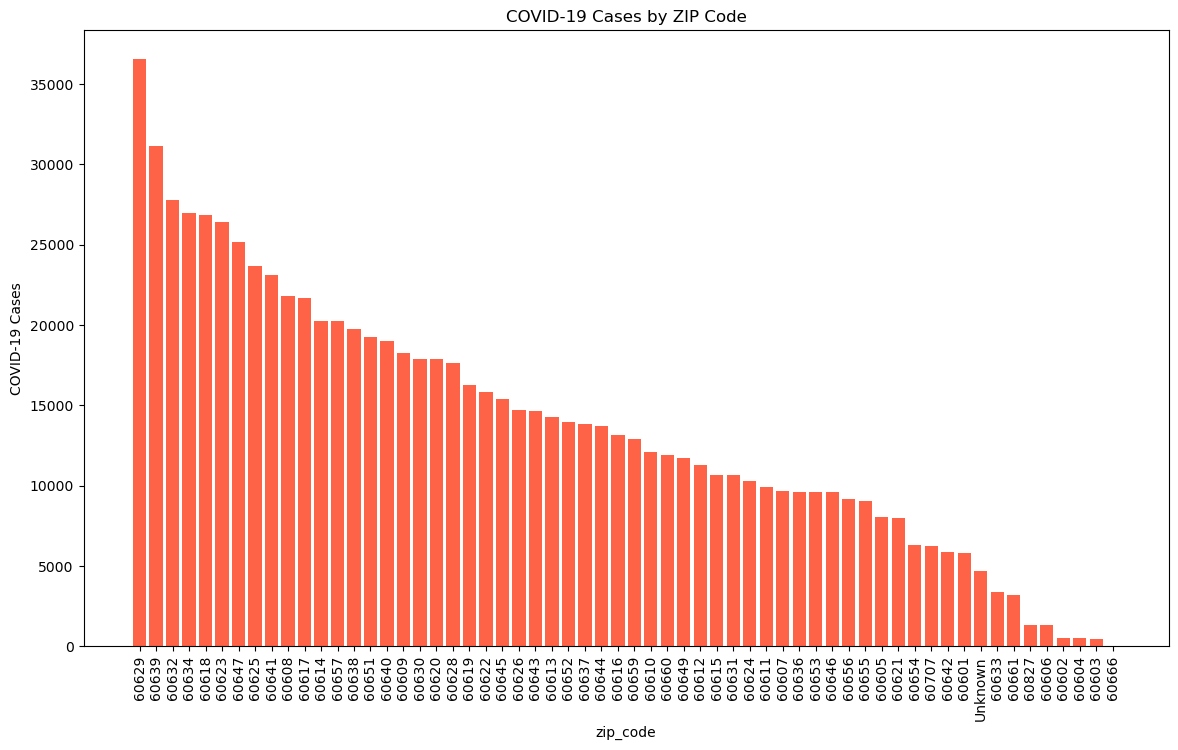

In [3]:

# Load the GeoJSON data
cases_geo = gpd.read_file('COVID-19_Code_20240422.geojson')

# Convert 'population' and 'cases_cumulative' columns to numeric, handling non-numeric values
cases_geo['population'] = pd.to_numeric(cases_geo['population'], errors='coerce')  # Convert and set errors to NaN
cases_geo['cases_cumulative'] = pd.to_numeric(cases_geo['cases_cumulative'], errors='coerce')

# Fill NaN values with 0 or another appropriate value if necessary
cases_geo['population'].fillna(0, inplace=True)
cases_geo['cases_cumulative'].fillna(0, inplace=True)

# Ensure no None values are left which could raise errors in plotting
print(cases_geo[['population', 'cases_cumulative']].isnull().sum())

# Sorting data by population in descending order for better visualization
sorted_by_population = cases_geo.sort_values(by='population', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(sorted_by_population['zip_code'], sorted_by_population['population'], color='skyblue')
plt.xlabel('zip_code')
plt.ylabel('population')
plt.title('Population by ZIP Code')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.show()

#Plot population against total cases by zip
# Sorting data by COVID-19 cases in descending order
sorted_by_cases = cases_geo.sort_values(by='cases_cumulative', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(sorted_by_cases['zip_code'], sorted_by_cases['cases_cumulative'], color='tomato')
plt.xlabel('zip_code')
plt.ylabel('COVID-19 Cases')
plt.title('COVID-19 Cases by ZIP Code')
plt.xticks(rotation=90)
plt.show()


## Findings
#### These visualizations givea clear view of how population and COVID-19 cases are distributed across ZIP codes. We can see from the data that covid cases are directly related to population density. Additionally, the number of COVID-19 cases is not evenly distributed across ZIP codes. This suggests that certain areas were more affected by the pandemic than others. Which means other confounding variables like: socioeconomic status, access to healthcare services and compliance with public health measures could be affecting the data could potentially play a role

# Socio-econimic status vs Covid cases:

As a bonus I want to examine the effects of socioeconomic status to see if there is any correlation. 

### Load and Prepapre datasets
COVID-19 Cases: This will provide the number of cases per ZIP code.
Socioeconomic Data: Indicates which areas are socioeconomically disadvantaged.
ZIP Code Boundaries: Used for merging other datasets based on ZIP code and for spatial visualizations.

In [4]:
# Load the datasets
covid_data = gpd.read_file('COVID-19_Code_20240422.geojson')
disadvantaged_areas = gpd.read_file('Socioeconomically_Disadvantaged_Areas_20240422.geojson')
zip_boundaries = gpd.read_file('Boundaries - ZIP Codes.geojson')

# Initialize Kepler.gl map
map = KeplerGl(height=600)

# Add data to the map
map.add_data(data=disadvantaged_areas, name='Disadvantaged Areas')
map.add_data(data=zip_boundaries, name='ZIP Code Boundaries')
# Display the map
map


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Disadvantaged Areas': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…

In [6]:
# Convert 'cases_cumulative' and 'population' to numeric types, handling errors
covid_data['cases_cumulative'] = pd.to_numeric(covid_data['cases_cumulative'], errors='coerce')
covid_data['population'] = pd.to_numeric(covid_data['population'], errors='coerce')

# Check for NaN values in these columns after conversion
nan_cases = covid_data['cases_cumulative'].isna().sum()
nan_population = covid_data['population'].isna().sum()
print(f'NaN values in cases_cumulative: {nan_cases}')
print(f'NaN values in population: {nan_population}')

# Handling NaN values by filling with zero (alternative could be dropping these rows)
covid_data['cases_cumulative'].fillna(0, inplace=True)
covid_data['population'].fillna(0, inplace=True)

# Calculate 'cases_per_capita' safely after ensuring data types are correct
covid_data['cases_per_capita'] = (covid_data['cases_cumulative'] / covid_data['population']) * 1000

# Verify the changes and see the first few rows of the updated DataFrame
print(covid_data[['cases_cumulative', 'population', 'cases_per_capita']].head())

NaN values in cases_cumulative: 223
NaN values in population: 0
   cases_cumulative  population  cases_per_capita
0            6287.0       34311        183.235697
1            6890.0       34311        200.810236
2            7670.0       34311        223.543470
3            7852.0       34311        228.847891
4            7938.0       34311        231.354376


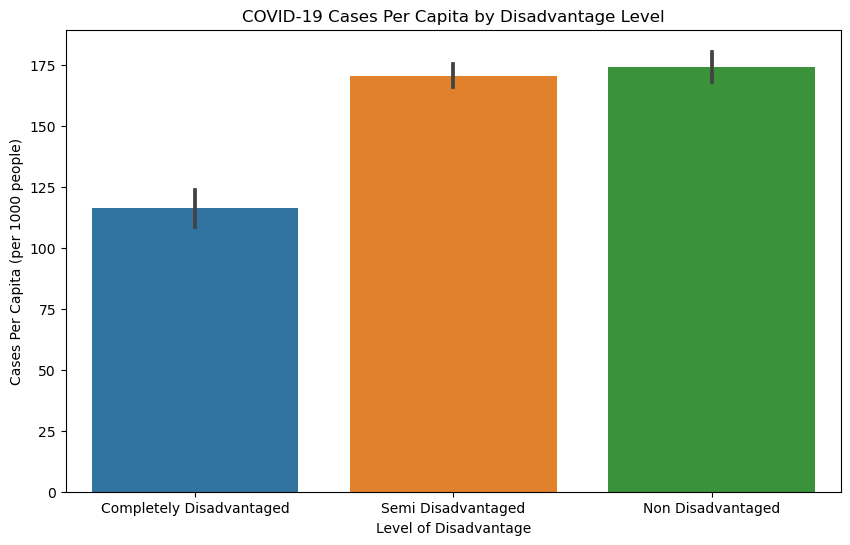

In [8]:
import seaborn as sns

completely_disadvantaged_zips = ['60624', '60621', '60827']
semi_disadvantaged_zips = ['60609', '60608', '60617', '60629', '60633', '60649', '60644']
non_disadvantaged_zips = ['60652', '60618', '60625', '60630', '60613']  # Based on the data shown above

# Categorizing the zip codes based on the level of disadvantage
conditions = [
    covid_data['zip_code'].isin(completely_disadvantaged_zips),
    covid_data['zip_code'].isin(semi_disadvantaged_zips),
    covid_data['zip_code'].isin(non_disadvantaged_zips)
]
choices = ['Completely Disadvantaged', 'Semi Disadvantaged', 'Non Disadvantaged']

covid_data['Disadvantage Level'] = py.select(conditions, choices, default='Unknown')

# Calculate cases per capita if population data is available
covid_data['cases_per_capita'] = covid_data['cases_cumulative'] / covid_data['population'] * 1000

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Disadvantage Level', y='cases_per_capita', data=covid_data, order=['Completely Disadvantaged', 'Semi Disadvantaged', 'Non Disadvantaged'])
plt.title('COVID-19 Cases Per Capita by Disadvantage Level')
plt.xlabel('Level of Disadvantage')
plt.ylabel('Cases Per Capita (per 1000 people)')
plt.show()


# Findings:
#### Shokingly, the non disadvantaged neighborhood have the highest Cases per capita